### Author: Hoang Chu

#### Imports

In [52]:
%pip install -r dependencies.txt

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import requests

In [54]:
import importlib
import helper, consts

In [55]:
importlib.reload(consts)
importlib.reload(helper)

<module 'helper' from '/Users/hoangchu/Documents/Clinic/code/helper.py'>

In [56]:
does_sub_df_has_Nan = lambda df, col_name: df[[col_name]].isna().any(axis=COL_AX)

#### CONSTANTS

In [57]:
ROW_AX = 0
COL_AX = 1

In [58]:
DATA_PATH = consts.DATA_PATH
DATA_PATH

'../data/'

In [59]:
RESPONSE_NAME = "rel2retcfrtxm_nt_0"
PREDICTOR_NAME = 'rrirpnxm_nt_0'

#### Feature Selection

##### Read the data

In [60]:
# local read

data_20191202_1200_df = pd.read_csv(DATA_PATH + "data_20191202_1200.csv")
data_20191203_1200_df = pd.read_csv(DATA_PATH + "data_20191203_1200.csv")

In [61]:
# cloud read -- TODO: NEED A PERMANENT LINK!!

# importlib.reload(consts)

# url = ... # url in consts.py
# assert requests.get(url).status_code == 200
# data_20191202_1200_df = pd.read_csv(url)
# data_20191202_1200_df.head()

In [62]:
data_20191202_1200_df.head()

,eqid,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,...,tr_md_1,tr_nt_0,tr_nt_1,tr_nt_12to16,tr_nt_17to21,tr_nt_1to3,tr_nt_4to6,tr_nt_7to11,tr_pm_1,tr_toxhr_0
0,2,0.000594,-0.016720,-0.015436,-0.002487,0.011511,-0.038052,0.025530,0.231635,-0.065247,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,24,0.001446,0.001475,-0.007683,-0.001346,0.027832,-0.006712,0.029269,-0.482915,1.571073,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,41,0.000069,-0.019774,-0.013203,-0.003210,-0.001507,-0.040861,0.005203,0.165615,-2.223915,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,52,0.000120,-0.000934,-0.002772,-0.000651,0.005818,-0.004393,0.006443,-1.229984,-1.670970,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,53,0.000892,0.004249,0.002662,-0.000931,-0.034163,0.007955,-0.037853,-1.326470,0.342333,...,0.0,0.0,0.0,0.0,0.012116,0.0,0.0,-0.055974,0.0,0.0


In [63]:
data_20191203_1200_df.head()

,eqid,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,...,tr_md_1,tr_nt_0,tr_nt_1,tr_nt_12to16,tr_nt_17to21,tr_nt_1to3,tr_nt_4to6,tr_nt_7to11,tr_pm_1,tr_toxhr_0
0,2,0.000593,-0.000483,0.003061,-0.006579,0.018780,0.003119,0.005497,0.216982,-0.066674,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,24,0.001440,0.003489,0.004389,0.002297,0.016830,0.011347,0.009217,-0.427661,1.573204,...,0.0,-0.008642,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,41,0.000068,-0.010172,0.019113,-0.012536,0.013701,-0.010480,0.015336,0.174722,-2.230982,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.001403,0.0
3,52,0.000119,0.005442,0.007321,-0.004481,-0.004175,0.006293,-0.001985,-1.244155,-1.679844,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,53,0.000890,-0.002826,-0.013945,0.008352,-0.060023,-0.009034,-0.066470,-1.347409,0.340463,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.055974,0.000000,0.0


##### If needed, transform the data

In [64]:
# TODO: SIGNIFICANT ERROR IN LATER PART IF YOU DO THIS!

# AVOID_DIVIDE_BY_ZERO_CONST = 1

# data_20191202_1200_df.iloc[:, 1:] = data_20191202_1200_df.iloc[:, 1:] * 100 + AVOID_DIVIDE_BY_ZERO_CONST
# data_20191203_1200_df.iloc[:, 1:] = data_20191203_1200_df.iloc[:, 1:] * 100 + AVOID_DIVIDE_BY_ZERO_CONST

# data_20191202_1200_df = np.log(data_20191202_1200_df + AVOID_DIVIDE_BY_ZERO_CONST)
# data_20191203_1200_df = np.log(data_20191203_1200_df + AVOID_DIVIDE_BY_ZERO_CONST)

##### Get the responses columns

In [65]:
training_responses = data_20191202_1200_df['rrirpnxm_lst15_0']
actual_responses = data_20191203_1200_df['rrirpnxm_lst15_0']

##### 20191202_1200 data

In [66]:
data_20191202_1200_df.head()

,eqid,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,...,tr_md_1,tr_nt_0,tr_nt_1,tr_nt_12to16,tr_nt_17to21,tr_nt_1to3,tr_nt_4to6,tr_nt_7to11,tr_pm_1,tr_toxhr_0
0,2,0.000594,-0.016720,-0.015436,-0.002487,0.011511,-0.038052,0.025530,0.231635,-0.065247,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,24,0.001446,0.001475,-0.007683,-0.001346,0.027832,-0.006712,0.029269,-0.482915,1.571073,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,41,0.000069,-0.019774,-0.013203,-0.003210,-0.001507,-0.040861,0.005203,0.165615,-2.223915,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,52,0.000120,-0.000934,-0.002772,-0.000651,0.005818,-0.004393,0.006443,-1.229984,-1.670970,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,53,0.000892,0.004249,0.002662,-0.000931,-0.034163,0.007955,-0.037853,-1.326470,0.342333,...,0.0,0.0,0.0,0.0,0.012116,0.0,0.0,-0.055974,0.0,0.0


In [67]:
data_20191202_1200_df.corr().isna().sum()

eqid            16
wt              16
today           16
tonight         16
tmwam           16
              ... 
tr_nt_1to3      16
tr_nt_4to6      16
tr_nt_7to11     16
tr_pm_1        252
tr_toxhr_0      16
Length: 252, dtype: int64

In [68]:
data_20191202_1200_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Columns: 252 entries, eqid to tr_toxhr_0
dtypes: float64(251), int64(1)
memory usage: 5.6 MB


In [69]:
data_20191202_1200_df = data_20191202_1200_df.astype(float)
data_20191202_1200_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Columns: 252 entries, eqid to tr_toxhr_0
dtypes: float64(252)
memory usage: 5.6 MB


Something going here...some column pairs have NaN correlations, despite all having compute-able data types.

In [70]:
data_20191202_1200_corr_df = data_20191202_1200_df.corr()

In [71]:
temp0 = data_20191202_1200_corr_df[['today']][does_sub_df_has_Nan(data_20191202_1200_corr_df, 'today')]
temp1 = data_20191202_1200_corr_df[['tonight']][does_sub_df_has_Nan(data_20191202_1200_corr_df, 'tonight')]
temp2 = data_20191202_1200_corr_df[['wt']][does_sub_df_has_Nan(data_20191202_1200_corr_df, 'wt')]

temp0 = temp0.index.to_list()
temp1 = temp1.index.to_list()
temp2 = temp2.index.to_list()

assert temp0 == temp1
assert temp1 == temp2

temp0

['llirpnxm_pm_1',
 'nnetticksrelrrsign_pm_1',
 'nsameticksrelrrsign_pm_1',
 'rel2retcfrtxm_pm_1',
 'relntrds70tr_pm_1',
 'relvol_pm_1',
 'rrirpnxm_pm_1',
 'rrretstr_pm_1',
 'rvdelta_nt_0',
 'rvdelta_nt_1',
 'rvdelta_nt_12to16',
 'rvdelta_nt_17to21',
 'rvdelta_nt_1to3',
 'rvdelta_nt_4to6',
 'rvdelta_nt_7to11',
 'tr_pm_1']

In [72]:
TOBE_REMOVED_20191202_1200_COLUMNS = ["eqid", "tmwam", "dn3sttmwmd", "dn1", "dn4x1"]
TOBE_REMOVED_20191202_1200_COLUMNS.extend(temp0)

In [73]:
data_20191202_1200_df.corr().isnull().sum()

eqid            16
wt              16
today           16
tonight         16
tmwam           16
              ... 
tr_nt_1to3      16
tr_nt_4to6      16
tr_nt_7to11     16
tr_pm_1        252
tr_toxhr_0      16
Length: 252, dtype: int64

##### 20191203_1200 data

In [74]:
data_20191203_1200_df.corr().isna().sum()

eqid           7
wt             7
today          7
tonight        7
tmwam          7
              ..
tr_nt_1to3     7
tr_nt_4to6     7
tr_nt_7to11    7
tr_pm_1        7
tr_toxhr_0     7
Length: 252, dtype: int64

In [75]:
data_20191203_1200_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Columns: 252 entries, eqid to tr_toxhr_0
dtypes: float64(251), int64(1)
memory usage: 5.6 MB


In [76]:
data_20191203_1200_df = data_20191203_1200_df.astype(float)
data_20191203_1200_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Columns: 252 entries, eqid to tr_toxhr_0
dtypes: float64(252)
memory usage: 5.6 MB


In [77]:
data_20191203_1200_corr_df = data_20191203_1200_df.corr()

In [78]:
temp0 = data_20191203_1200_corr_df[['today']][does_sub_df_has_Nan(data_20191203_1200_corr_df, 'today')]
temp1 = data_20191203_1200_corr_df[['tonight']][does_sub_df_has_Nan(data_20191203_1200_corr_df, 'tonight')]
temp2 = data_20191203_1200_corr_df[['wt']][does_sub_df_has_Nan(data_20191203_1200_corr_df, 'wt')]

temp0 = temp0.index.to_list()
temp1 = temp1.index.to_list()
temp2 = temp2.index.to_list()

assert temp0 == temp1
assert temp1 == temp2
print(temp0)

['rvdelta_nt_0', 'rvdelta_nt_1', 'rvdelta_nt_12to16', 'rvdelta_nt_17to21', 'rvdelta_nt_1to3', 'rvdelta_nt_4to6', 'rvdelta_nt_7to11']


In [79]:
TOBE_REMOVED_20191203_1200_COLUMNS = ["eqid", "tmwam", "dn3sttmwmd", "dn1", "dn4x1"] + ["today", "tonight"]
TOBE_REMOVED_20191203_1200_COLUMNS.extend(temp0)

In [80]:
data_20191203_1200_df.corr().isna().sum()

eqid           7
wt             7
today          7
tonight        7
tmwam          7
              ..
tr_nt_1to3     7
tr_nt_4to6     7
tr_nt_7to11    7
tr_pm_1        7
tr_toxhr_0     7
Length: 252, dtype: int64

##### Get training_predictors_df and testing_predictors_df

In [81]:
TOBE_REMOVED_20191202_1200_COLUMNS_set = set(TOBE_REMOVED_20191202_1200_COLUMNS)
TOBE_REMOVED_20191203_1200_COLUMNS_set = set(TOBE_REMOVED_20191203_1200_COLUMNS)
TOBE_REMOVED_20191202_1200_COLUMNS_set == TOBE_REMOVED_20191203_1200_COLUMNS_set

False

In [82]:
# Appear in TOBE_REMOVED_20191202_1200_COLUMNS_set but not in TOBE_REMOVED_20191203_1200_COLUMNS_set
print(TOBE_REMOVED_20191202_1200_COLUMNS_set - TOBE_REMOVED_20191203_1200_COLUMNS_set)

{'rel2retcfrtxm_pm_1', 'relvol_pm_1', 'llirpnxm_pm_1', 'tr_pm_1', 'rrirpnxm_pm_1', 'nnetticksrelrrsign_pm_1', 'nsameticksrelrrsign_pm_1', 'rrretstr_pm_1', 'relntrds70tr_pm_1'}


In [83]:
# Appear in TOBE_REMOVED_20191203_1200_COLUMNS_set but not in TOBE_REMOVED_20191202_1200_COLUMNS_set
print(TOBE_REMOVED_20191203_1200_COLUMNS_set - TOBE_REMOVED_20191202_1200_COLUMNS_set)

{'tonight', 'today'}


Since 'rrirpnxm_lst15_0' should be a response variable, I think we can see how regression works with ONLY 'removed_prevDay_but_notRemoved_today_columns', then that of WITHOUT 'removed_prevDay_but_notRemoved_today_columns'.

In [84]:
removed_prevDay_but_notRemoved_today_columns = TOBE_REMOVED_20191202_1200_COLUMNS_set - TOBE_REMOVED_20191203_1200_COLUMNS_set
removed_toDay_but_notRemoved_prevday_columns = TOBE_REMOVED_20191203_1200_COLUMNS_set - TOBE_REMOVED_20191202_1200_COLUMNS_set

In [85]:
data_20191202_1200_working_df = data_20191202_1200_df.drop(TOBE_REMOVED_20191202_1200_COLUMNS, axis=COL_AX)
data_20191202_1200_working_df = data_20191202_1200_working_df.drop(list(removed_toDay_but_notRemoved_prevday_columns), axis = COL_AX)

In [86]:
data_20191203_1200_working_df = data_20191203_1200_df.drop(TOBE_REMOVED_20191203_1200_COLUMNS, axis=COL_AX)
data_20191203_1200_working_df = data_20191203_1200_working_df.drop(list(removed_prevDay_but_notRemoved_today_columns), axis=COL_AX)

In [87]:
assert set(data_20191203_1200_working_df.columns) == set(data_20191202_1200_working_df.columns)

In [88]:
training_predictors_df = data_20191202_1200_working_df.copy()
testing_predictors_df = data_20191203_1200_working_df.copy()

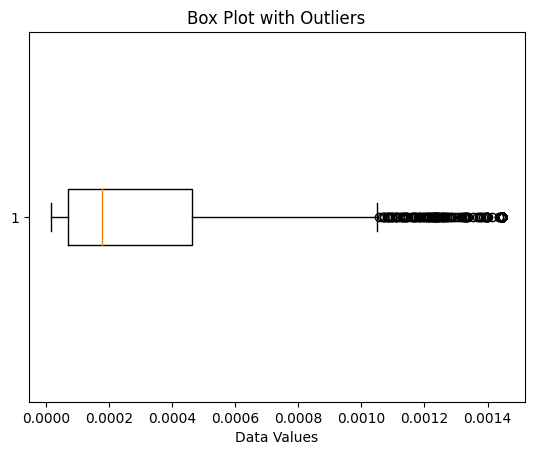

In [89]:
# Create a box plot with outliers
plt.boxplot(training_predictors_df[training_predictors_df.columns[0]], vert=False, whis=1.5)  # vert=False for horizontal box plot
plt.title("Box Plot with Outliers")
plt.xlabel("Data Values")
plt.show()

In [90]:
np.divide(training_predictors_df.quantile(1.0), training_predictors_df.quantile(0.75)).describe()

count    229.000000
mean            inf
std             NaN
min     -820.857107
25%        5.336594
50%        9.102537
75%       19.604142
max             inf
dtype: float64

INSANE OUTLIERS!

I will use LASSO for the next step of feature selection because there are a lot of outliers, and LASSO works by restricting the sum of the absolute value of the coefficients to being less than a set value, so the impact of outliers is significantly curtailed.

In [91]:
# Source: https://scikit-learn.org/stable/modules/feature_selection.html

In [92]:
print(f"Shape of training observations: {training_predictors_df.shape}")
print(f"Number of training responses: {len(training_responses)}")
print()
print(f"Shape of testing observations: {testing_predictors_df.shape}")
print(f"Number of actual responses: {len(actual_responses)}")

Shape of training observations: (2910, 229)
Number of training responses: 2910

Shape of testing observations: (2915, 229)
Number of actual responses: 2915


#### Build a multiple linear regression model

##### Retrieve the beta(s)

In [93]:
import sklearn.linear_model

multiple_linreg = sklearn.linear_model.Lasso(alpha=42) # any number between 0 and inf, need statistics
multiple_linreg.fit(training_predictors_df, training_responses)
multiple_linreg.coef_

array([ 0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,
        0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0., -0., -0., -0., -0.,
        0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,
        0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0., -0.,
        0., -0., -0., -0.,  0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,
       -0., -0.,  0., -0.,  0., -0., -0., -0., -0., -0.,  0.,  0., -0.,
        0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0.,
        0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,
       -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0

##### Make predictions

In [94]:
predicted_responses = multiple_linreg.predict(testing_predictors_df)

#### Model evaluation

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
mse = mean_squared_error(actual_responses, predicted_responses)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.467166332377552e-06


In [97]:
# Higher better. 1 is perfect prediction
r_squared = r2_score(actual_responses, predicted_responses)
print(f"R-Squared: {r_squared}")

R-Squared: -0.001497823494456041


In [98]:
residuals = actual_responses - predicted_responses

#### Check linear regression assumptions

##### Residuals must be normally distributed w/ Q-Q plot

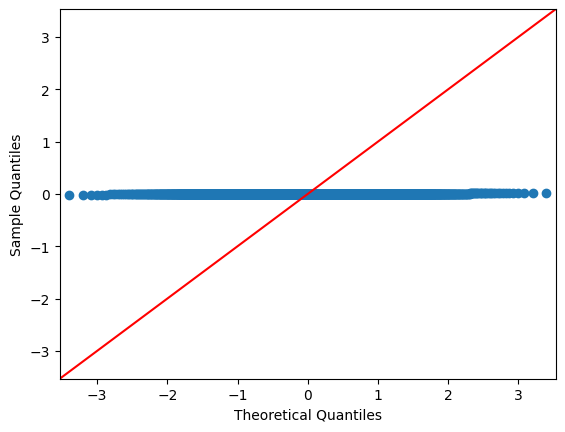

In [99]:
import statsmodels.api as sm

sm.qqplot(np.array(residuals), line = '45'); # A semicolon to avoid 2 similar plots -- this has been the library's bug for 5 years!

In [100]:
helper.shapiro_test(residuals)

Shapiro-Wilk Test: Residuals NOT normally distributed.


##### Mean of residuals should be 0

In [101]:
np.mean(residuals)

9.834727473136344e-05

##### Check for multi-collinearity

In [102]:
helper.vif_test(r_squared)

VIF = 0.9985044166254603. This model performs worse than a horizontal line :(


##### Residuals have a fixed variance

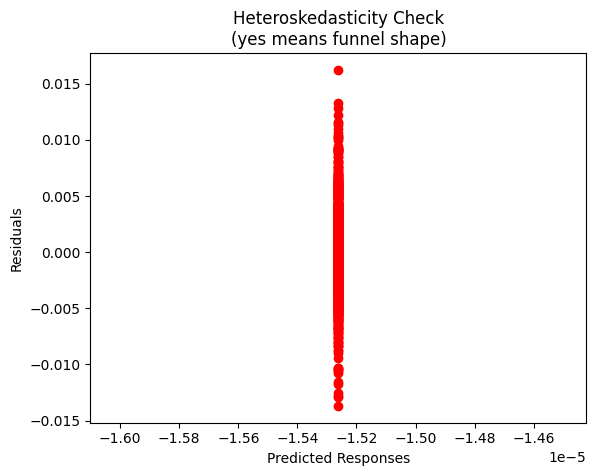

In [103]:
plt.scatter(x=predicted_responses, y = residuals, color = 'r')  # Replace X[:, 0] with the desired predictor variable
plt.xlabel('Predicted Responses')  # Replace 'X' with the label of the predictor variable
plt.ylabel('Residuals')
plt.title('Heteroskedasticity Check\n(yes means funnel shape)')
plt.show()

In [104]:
# White test if only use 1 predictor (simple linear regression)
# for multiple linear regression, use bp-test

helper.bp_test(residuals, testing_predictors_df)

Breusch-Pagan Test: Residuals DO NOT have constant variance.


In [105]:
%pip freeze > dependencies.txt

Note: you may need to restart the kernel to use updated packages.
